In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import matplotlib.cm as cm
import seaborn
seaborn.set()
%matplotlib inline

In [2]:
# Load data
df_paper = pd.read_json('data/paper_df.json')
df_author = pd.read_json('data/author_df.json')
df_inst = pd.read_json('data/inst_df.json')
df_country = pd.read_json('data/country_df.json')
df_paper = df_paper.drop([0]) # has nan
# All data are available at https://github.com/pajotarthur/ICLR_data

avg #authors on company papers: 4.77
avg #authors on academc papers: 3.49


Text(0,0.5,'cost for one paper')

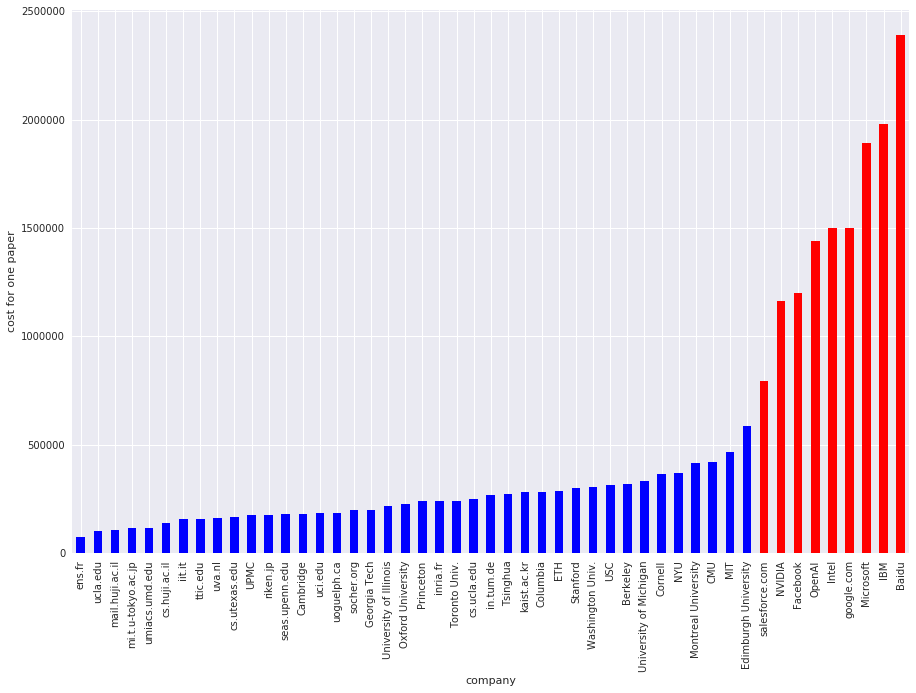

In [4]:
companies = ['Baidu', 'Facebook', 'IBM', 'Intel', 'Microsoft', 'NVIDIA', 'OpenAI', 'google.com', 'salesforce.com']
# assumptions
# we also assume here that every author on the paper used exactly that time to work on the paper 
# (but since we assume this for both academia and industry it might not matter)
companies_pay_annual = 500000
institute_pay_annual = 100000
months_for_one_paper = 4

data = df_inst[df_inst.nb_poster > 1]

# Average number of authors on companies/institution papers
print("avg #authors on company papers: {:.2f}".format(data[data.index.isin(companies)]['avg_nb_author'].mean()))
print("avg #authors on academc papers: {:.2f}".format(data[[not b for b in data.index.isin(companies)]]['avg_nb_author'].mean()))

data = (data.avg_nb_author / data.acceptance_rate)
data = pd.DataFrame({'company': data.index, 'authors_to_achieve_one_paper': data.values})
data.set_index(['company'], inplace=True)

data['per_author_pay'] = pd.Series(np.zeros(len(data)), index=data.index)
data['per_author_pay'][data.index.isin(companies)] = companies_pay_annual * months_for_one_paper / 12
data['per_author_pay'][[not b for b in data.index.isin(companies)]] = institute_pay_annual * months_for_one_paper / 12
data['cost_for_one_paper'] = data['authors_to_achieve_one_paper'] * data['per_author_pay']

sorted_data = data['cost_for_one_paper'].sort_values()
colors = np.array(['b'] * len(data))
colors[sorted_data.index.isin(companies)] = 'r'
ax = sorted_data.plot.bar(figsize=(15, 10), color=colors)
ax.set_ylabel('cost for one paper')
